In [286]:
from qiskit import __version__
print(__version__)

1.4.2


In [348]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, state_fidelity, Pauli, DensityMatrix
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile 
import numpy as np
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError, pauli_error 
from qiskit.circuit.library import HGate, UnitaryGate, RZGate
import matplotlib.pyplot as plt

# Encoding Circuit

In [349]:
cntrol3_pi = RZGate(np.pi).control(3)
cntrol2_pi = RZGate(np.pi).control(2)

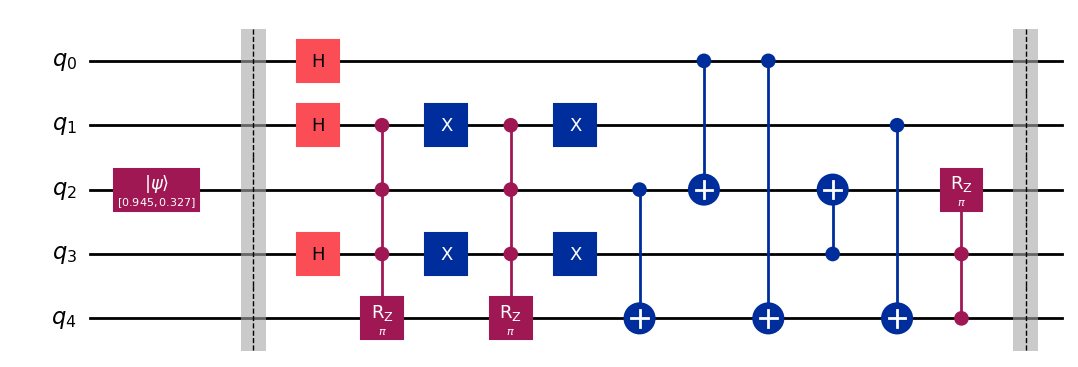

In [356]:
n = 3
qc = QuantumCircuit(5)

theta = np.arctan(np.sqrt((np.sqrt(5) - 1) / 2))
amp0 = np.cos(theta/2)
amp1 = np.sin(theta/2)

qc.initialize([amp0, amp1], 2)
qc.barrier()
qc.h(0)
qc.h(1)
qc.h(3)

qc.append(cntrol3_pi, [1, 2, 3, 4])

qc.x(1)
qc.x(3)
qc.append(cntrol3_pi, [1, 2, 3, 4])
qc.x(1)
qc.x(3)

qc.cx(2, 4)
qc.cx(0, 2)
qc.cx(0, 4)
qc.cx(3, 2)

qc.cx(1, 4)
qc.append(cntrol2_pi, [4, 3, 2])
qc.barrier()

display(qc.draw(output='mpl'))

In [363]:
state = Statevector.from_instruction(qc)
display(state.draw("latex"))
print(state)

<IPython.core.display.Latex object>

Statevector([ 3.34117436e-01-4.16333634e-17j,
             -6.93889390e-18-1.15609424e-01j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              1.15609424e-01+6.93889390e-18j,
              3.34117436e-01+1.38777878e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-1.15609424e-01j,
              3.34117436e-01-4.16333634e-17j,
              3.34117436e-01+4.16333634e-17j,
              1.15609424e-01+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              3.34117436e-01-1.38777878e-17j,
              1.15609424e-01+0.00000000e+00j,
              0.00000000e+00-1.15609424e-01j,
              3.34117436e-01-1.387

In [364]:
print(amp0/(2*np.sqrt(2)))
print(amp1/(2*np.sqrt(2)))

0.33411743610568867
0.11560942388127812


In [365]:
ideal = Statevector([ 3.34117436e-01-4.16333634e-17j,
             -6.93889390e-18-1.15609424e-01j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              1.15609424e-01+6.93889390e-18j,
              3.34117436e-01+1.38777878e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-1.15609424e-01j,
              3.34117436e-01-4.16333634e-17j,
              3.34117436e-01+4.16333634e-17j,
              1.15609424e-01+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              3.34117436e-01-1.38777878e-17j,
              1.15609424e-01+0.00000000e+00j,
              0.00000000e+00-1.15609424e-01j,
              3.34117436e-01-1.38777878e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-1.15609424e-01j,
              1.38777878e-17-3.34117436e-01j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              1.38777878e-17+3.34117436e-01j,
              1.15609424e-01+0.00000000e+00j],
            dims=(2, 2, 2, 2, 2))

# Fault-Tolerant QEC Circuit

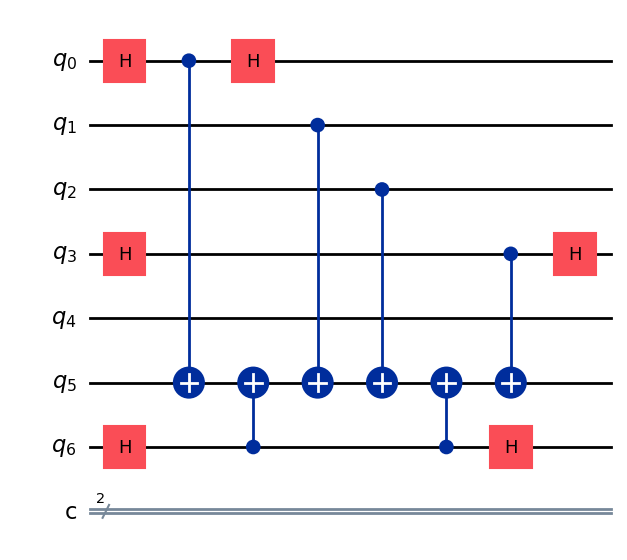

In [361]:
# Last two qubits are syndrome and flag qubits
QEC_circ = QuantumCircuit(7,2)

# Last qubit is initialized to be |+>
QEC_circ.h(6)

QEC_circ.h(0)
QEC_circ.cx(0, 5)
QEC_circ.h(0)

QEC_circ.cx(6, 5)

QEC_circ.cx(1, 5)
QEC_circ.cx(2, 5)

QEC_circ.cx(6, 5)

QEC_circ.h(3)
QEC_circ.cx(3, 5)
QEC_circ.h(3)

# To measure the last qubit in the X basis
QEC_circ.h(6)

display(QEC_circ.draw(output='mpl'))

In [ ]:
meas_circuit_noise = QEC_circ.copy()
meas_circuit_noise.measure([5, 6], [0, 1])